<a href="https://colab.research.google.com/github/Trading-com-Dados/tutoriais_publicos/blob/main/An%C3%A1lise_Carteira_vs_CDI_e_outros_benchmarks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparação e carteira com o CDI e outros benchmarks

A intenção deste código é servir como um framework de comparação de uma carteira fictícia com um CDB também fictício que rende 100% do CDI.

## 1. Instalando e importando bibliotecas

In [ ]:
!pip install yfinance
!pip install quandl

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import quandl

# 2. Importando dados

Repare que vou importar também os dados da cotação do dólar. Posteriormente vou converter a cotação do Ethereum para reais, por isso que estou trazendo a cotação do dólar.

In [ ]:
ativos = ['ITUB4.SA', 'PETR4.SA', 'VALE3.SA','BBAS3.SA', 
          'ABEV3.SA', 'CIEL3.SA', 'EZTC3.SA', 'ECOR3.SA', 
          'WEGE3.SA', 'RADL3.SA', 'OIBR3.SA']

In [ ]:
inicio = '2012-01-01'
fim = '2021-09-24'

In [ ]:
precos = pd.DataFrame()

for i in ativos:
  precos[i] = yf.download(i, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## 3. Simulação de uma carteira vs. IBOV

Criando um dicionário com as alocações que vamos fazer para cada ativo na nossa carteira

In [ ]:
compras = {'ITUB4.SA':6000, 'PETR4.SA':4000, 'VALE3.SA':3000, 
           'BBAS3.SA':2000, 'ABEV3.SA':2000, 'CIEL3.SA':1000, 
           'EZTC3.SA': 800, 'ECOR3.SA':600 , 'WEGE3.SA':400,
           'RADL3.SA':100, 'OIBR3.SA':100}
           
compras_df = pd.Series(data=compras, index=list(compras.keys()))

Qual o valor total da nossa carteira?

In [ ]:
sum(compras.values())

20000

Obtendo preços dos ativos no primeiro dia do investimento

In [ ]:
primeiro = precos.iloc[0]

Quantidade de papéis comprados de cada ativo

In [ ]:
qtd_acoes = compras_df/primeiro

Criando um dataframe que contém a posição diária de cada ativo

In [ ]:
PL = precos*qtd_acoes

In [ ]:
PL.head()

,ITUB4.SA,PETR4.SA,VALE3.SA,BBAS3.SA,ABEV3.SA,CIEL3.SA,EZTC3.SA,ECOR3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA
Date,,,,,,,,,,,
2012-01-02,6000.000000,4000.000000,3000.000000,2000.000000,2000.000000,1000.000000,800.000000,600.000000,400.000000,100.000000,100.000000
2012-01-03,6149.863133,4159.107643,3133.496347,1990.942072,1977.206217,1003.723041,824.844691,599.552970,409.431655,101.515154,102.416686
2012-01-04,6156.917429,4188.803074,3154.767090,1981.061341,1931.250587,1007.238847,831.304054,590.611147,411.575448,101.515154,102.166672
2012-01-05,6111.074153,4140.547767,3070.415746,1960.476498,1893.015001,992.761224,797.515526,581.669133,414.147714,100.757612,100.333340
2012-01-06,6156.917429,4144.260849,3044.009222,1911.073714,1888.235797,986.556701,801.490465,571.385899,409.431655,100.378781,101.583341


In [ ]:
PL_filter = PL.dropna(axis='rows')

In [ ]:
PL_filter.head(3)

,ITUB4.SA,PETR4.SA,VALE3.SA,BBAS3.SA,ABEV3.SA,CIEL3.SA,EZTC3.SA,ECOR3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA
Date,,,,,,,,,,,
2012-01-02,6000.000000,4000.000000,3000.000000,2000.000000,2000.000000,1000.000000,800.000000,600.000000,400.000000,100.000000,100.000000
2012-01-03,6149.863133,4159.107643,3133.496347,1990.942072,1977.206217,1003.723041,824.844691,599.552970,409.431655,101.515154,102.416686
2012-01-04,6156.917429,4188.803074,3154.767090,1981.061341,1931.250587,1007.238847,831.304054,590.611147,411.575448,101.515154,102.166672


In [ ]:
PL_filter.tail()

,ITUB4.SA,PETR4.SA,VALE3.SA,BBAS3.SA,ABEV3.SA,CIEL3.SA,EZTC3.SA,ECOR3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA
Date,,,,,,,,,,,
2021-09-17,16078.097154,6028.799910,9647.463461,4398.201285,4043.095506,366.513591,2671.958897,647.749955,6892.084501,1092.992238,1.418030
2021-09-20,15713.999820,5961.087592,9266.716830,4255.343252,4009.702693,347.144970,2654.159790,626.247839,6839.325629,1078.036867,1.432801
2021-09-21,15673.544683,6096.511767,9420.135725,4363.246459,4022.546120,344.165188,2705.463051,641.030532,6990.568219,1065.573966,1.403259
2021-09-22,16037.642017,6251.282714,9754.969202,4465.070756,4037.958282,370.983265,2771.424330,661.860693,7134.776113,1051.033955,1.432801
2021-09-23,16557.781537,6490.693483,9702.707881,4477.228868,4079.057054,365.023700,2627.984644,665.892296,7192.811341,1057.265445,1.521428


Criando uma coluna que contém a posição consolidada da nossa carteira diariamente

In [ ]:
PL_filter['PL Total'] = PL_filter.iloc[:].sum(axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
PL_filter.head()

,ITUB4.SA,PETR4.SA,VALE3.SA,BBAS3.SA,ABEV3.SA,CIEL3.SA,EZTC3.SA,ECOR3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,PL Total
Date,,,,,,,,,,,,
2012-01-02,6000.000000,4000.000000,3000.000000,2000.000000,2000.000000,1000.000000,800.000000,600.000000,400.000000,100.000000,100.000000,20000.000000
2012-01-03,6149.863133,4159.107643,3133.496347,1990.942072,1977.206217,1003.723041,824.844691,599.552970,409.431655,101.515154,102.416686,20452.099608
2012-01-04,6156.917429,4188.803074,3154.767090,1981.061341,1931.250587,1007.238847,831.304054,590.611147,411.575448,101.515154,102.166672,20457.210843
2012-01-05,6111.074153,4140.547767,3070.415746,1960.476498,1893.015001,992.761224,797.515526,581.669133,414.147714,100.757612,100.333340,20162.713713
2012-01-06,6156.917429,4144.260849,3044.009222,1911.073714,1888.235797,986.556701,801.490465,571.385899,409.431655,100.378781,101.583341,20115.323854


In [ ]:
PL_filter.tail()

,ITUB4.SA,PETR4.SA,VALE3.SA,BBAS3.SA,ABEV3.SA,CIEL3.SA,EZTC3.SA,ECOR3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,PL Total
Date,,,,,,,,,,,,
2021-09-17,16078.097154,6028.799910,9647.463461,4398.201285,4043.095506,366.513591,2671.958897,647.749955,6892.084501,1092.992238,1.418030,51868.374527
2021-09-20,15713.999820,5961.087592,9266.716830,4255.343252,4009.702693,347.144970,2654.159790,626.247839,6839.325629,1078.036867,1.432801,50753.198083
2021-09-21,15673.544683,6096.511767,9420.135725,4363.246459,4022.546120,344.165188,2705.463051,641.030532,6990.568219,1065.573966,1.403259,51324.188969
2021-09-22,16037.642017,6251.282714,9754.969202,4465.070756,4037.958282,370.983265,2771.424330,661.860693,7134.776113,1051.033955,1.432801,52538.434127
2021-09-23,16557.781537,6490.693483,9702.707881,4477.228868,4079.057054,365.023700,2627.984644,665.892296,7192.811341,1057.265445,1.521428,53217.967677


Obtendo dados do CDI para comparar com a nossa carteira

In [ ]:
quandl.ApiConfig.api_key = "h3QLVaorrV7DJJQK6SLx"

In [ ]:
cdi = quandl.get("BCB/1161", start_date = inicio)

In [ ]:
cdi.head()

,Value
Date,
2012-01-02,0.0399
2012-01-03,0.0378
2012-01-04,0.0390
2012-01-05,0.0384
2012-01-06,0.0408


In [ ]:
cdi.rename(columns = {'Value': 'CDI'}, inplace = True)

In [ ]:
cdi = cdi[~(cdi == 0).any(axis=1)]

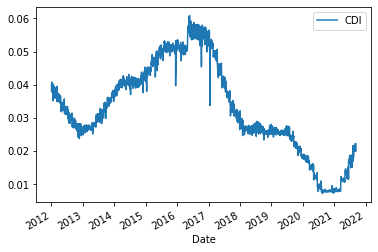

In [ ]:
cdi.plot()

Verificando se o índice dos dataframes está no formato 'data'

In [ ]:
cdi.index = pd.to_datetime(cdi.index)

In [ ]:
PL_filter.index = pd.to_datetime(PL_filter.index)

In [ ]:
PL_filter.head()

,ITUB4.SA,PETR4.SA,VALE3.SA,BBAS3.SA,ABEV3.SA,CIEL3.SA,EZTC3.SA,ECOR3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,PL Total
Date,,,,,,,,,,,,
2012-01-02,6000.000000,4000.000000,3000.000000,2000.000000,2000.000000,1000.000000,800.000000,600.000000,400.000000,100.000000,100.000000,20000.000000
2012-01-03,6149.863133,4159.107643,3133.496347,1990.942072,1977.206217,1003.723041,824.844691,599.552970,409.431655,101.515154,102.416686,20452.099608
2012-01-04,6156.917429,4188.803074,3154.767090,1981.061341,1931.250587,1007.238847,831.304054,590.611147,411.575448,101.515154,102.166672,20457.210843
2012-01-05,6111.074153,4140.547767,3070.415746,1960.476498,1893.015001,992.761224,797.515526,581.669133,414.147714,100.757612,100.333340,20162.713713
2012-01-06,6156.917429,4144.260849,3044.009222,1911.073714,1888.235797,986.556701,801.490465,571.385899,409.431655,100.378781,101.583341,20115.323854


In [ ]:
benckhmarks = ['^BVSP', 'USDBRL=X']

benchs = pd.DataFrame()

for i in benckhmarks:
  benchs[i] = yf.download(i, start = inicio, end = fim)['Adj Close']

benchs = pd.merge(benchs, cdi, how = 'inner', on = 'Date')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
benchs.head()

,^BVSP,USDBRL=X,CDI
Date,,,
2012-01-03,59265.0,1.8701,0.0378
2012-01-04,59365.0,1.8345,0.0390
2012-01-05,58546.0,1.8184,0.0384
2012-01-06,58600.0,1.8430,0.0408
2012-01-09,59083.0,1.8476,0.0401


Juntando tudo num dataframe só

In [ ]:
novo_df = pd.merge(benchs, PL_filter, how = 'inner', on = 'Date')

In [ ]:
novo_df.head()

,^BVSP,USDBRL=X,CDI,ITUB4.SA,PETR4.SA,VALE3.SA,BBAS3.SA,ABEV3.SA,CIEL3.SA,EZTC3.SA,ECOR3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,PL Total
Date,,,,,,,,,,,,,,,
2012-01-03,59265.0,1.8701,0.0378,6149.863133,4159.107643,3133.496347,1990.942072,1977.206217,1003.723041,824.844691,599.552970,409.431655,101.515154,102.416686,20452.099608
2012-01-04,59365.0,1.8345,0.0390,6156.917429,4188.803074,3154.767090,1981.061341,1931.250587,1007.238847,831.304054,590.611147,411.575448,101.515154,102.166672,20457.210843
2012-01-05,58546.0,1.8184,0.0384,6111.074153,4140.547767,3070.415746,1960.476498,1893.015001,992.761224,797.515526,581.669133,414.147714,100.757612,100.333340,20162.713713
2012-01-06,58600.0,1.8430,0.0408,6156.917429,4144.260849,3044.009222,1911.073714,1888.235797,986.556701,801.490465,571.385899,409.431655,100.378781,101.583341,20115.323854
2012-01-09,59083.0,1.8476,0.0401,6195.706960,4199.937247,3040.341650,1926.718990,1884.558950,990.486265,811.925366,588.822706,409.431655,100.757612,101.666690,20250.354090


In [ ]:
len(novo_df)

2378

In [ ]:
novo_df.CDI.iloc[1]

0.039

In [ ]:
novo_df.CDI

Date
2012-01-03    0.0378
2012-01-04    0.0390
2012-01-05    0.0384
2012-01-06    0.0408
2012-01-09    0.0401
               ...  
2021-09-03    0.0209
2021-09-06    0.0201
2021-09-08    0.0199
2021-09-09    0.0210
2021-09-10    0.0221
Name: CDI, Length: 2378, dtype: float64

In [ ]:
lista = []

for i in range(len(novo_df)):
  if i ==0:
    lista.append(1)
  else:
    lista.append( (lista[i-1])*((1+novo_df.CDI.iloc[i-1])**(1/252)) )

In [ ]:
lista = []

for i in range(len(novo_df)):
  if i ==0:
    lista.append(1)
  else:
    lista.append( (lista[i-1])*(1+(novo_df.CDI.iloc[i-1])/100) )

In [ ]:
lista

[1,
 1.000378,
 1.0007681474199999,
 1.0011524423886091,
 1.0015609125851037,
 1.0019625385110504,
 1.002344286238223,
 1.002731191132711,
 1.0031132317165325,
 1.0035084583298288,
 1.0038867810186192,
 1.0042793007499975,
 1.004683021028899,
 1.0050356647692802,
 1.0053924524302733,
 1.0057553991056007,
 1.0061466379558528,
 1.0065088507455169,
 1.0068973631619047,
 1.0072920669282641,
 1.0076909545867678,
 1.0080819386771476,
 1.0084720663874156,
 1.0088613366050412,
 1.009252774803644,
 1.0096181243081228,
 1.0099926926322411,
 1.0103825498115973,
 1.0107452771469796,
 1.0111364355692354,
 1.011510556050396,
 1.0119009991250316,
 1.0122845096036999,
 1.0126641162948014,
 1.0130469033307608,
 1.0134389524823497,
 1.0138311533569604,
 1.0142153953640827,
 1.0146068825066932,
 1.014983301660103,
 1.015372040264639,
 1.0157731122205433,
 1.0161479324989529,
 1.0165421978967626,
 1.0168959545816307,
 1.0172701722929167,
 1.0176506313373543,
 1.0180129149621104,
 1.018371255508177,
 1.018

In [ ]:
novo_df['CDB_100%_CDI'] = lista

In [ ]:
novo_df.tail()

,^BVSP,USDBRL=X,CDI,ITUB4.SA,PETR4.SA,VALE3.SA,BBAS3.SA,ABEV3.SA,CIEL3.SA,EZTC3.SA,ECOR3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,PL Total,CDB_100%_CDI
Date,,,,,,,,,,,,,,,,
2021-09-03,116933.0,5.1818,0.0209,17205.067033,6367.360579,11042.790628,4399.474404,4253.726836,385.882177,2731.638196,654.469314,6375.046489,1083.852840,1.491886,54500.800382,2.186579
2021-09-06,117869.0,5.1898,0.0201,17424.681106,6398.798161,10869.214348,4478.009494,4415.553680,391.841777,2782.941457,667.236206,6397.908912,1086.760827,1.506657,54914.452625,2.187036
2021-09-08,113413.0,5.1696,0.0199,16598.236674,6038.472835,10643.006100,4289.223231,4163.823088,370.983265,2591.339401,636.326974,6417.253988,1054.357379,1.447572,52804.470508,2.187476
2021-09-09,115361.0,5.3206,0.0210,16817.851849,6166.642432,10604.930306,4364.737852,4189.509943,370.983265,2613.326427,649.093801,6830.532596,1073.467129,1.521428,53682.597027,2.187911
2021-09-10,114286.0,5.1965,0.0221,16650.250736,6127.949810,10617.249389,4378.330252,4135.567989,365.023700,2655.206820,643.046333,6798.877139,1061.419666,1.447572,53434.369406,2.188371


Normalizando esse novo dataframe que contém o IBOV, todos os ativos e o PL da nossa carteira

In [ ]:
PL_normalizado = novo_df/novo_df.iloc[0]

In [ ]:
PL_normalizado.head()

,^BVSP,USDBRL=X,CDI,ITUB4.SA,PETR4.SA,VALE3.SA,BBAS3.SA,ABEV3.SA,CIEL3.SA,EZTC3.SA,ECOR3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,PL Total,CDB_100%_CDI
Date,,,,,,,,,,,,,,,,
2012-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2012-01-04,1.001687,0.980964,1.031746,1.001147,1.007140,1.006788,0.995037,0.976757,1.003503,1.007831,0.985086,1.005236,1.000000,0.997559,1.000250,1.000378
2012-01-05,0.987868,0.972354,1.015873,0.993693,0.995538,0.979869,0.984698,0.957419,0.989079,0.966868,0.970171,1.011519,0.992538,0.979658,0.985851,1.000768
2012-01-06,0.988779,0.985509,1.079365,1.001147,0.996430,0.971442,0.959884,0.955002,0.982897,0.971687,0.953020,1.000000,0.988806,0.991863,0.983533,1.001152
2012-01-09,0.996929,0.987969,1.060847,1.007454,1.009817,0.970271,0.967742,0.953142,0.986812,0.984337,0.982103,1.000000,0.992538,0.992677,0.990136,1.001561


In [ ]:
PL_normalizado[['CDB_100%_CDI']].tail()

,CDB_100%_CDI
Date,
2021-09-03,2.186579
2021-09-06,2.187036
2021-09-08,2.187476
2021-09-09,2.187911
2021-09-10,2.188371


In [ ]:
PL_normalizado = novo_df/novo_df.iloc[0]

In [ ]:
PL_normalizado.rename(columns = {'^BVSP': 'IBOV', 'USDBRL=X': 'Dólar', 
                                 'PL Total': 'Nossa Carteira'}, inplace = True)

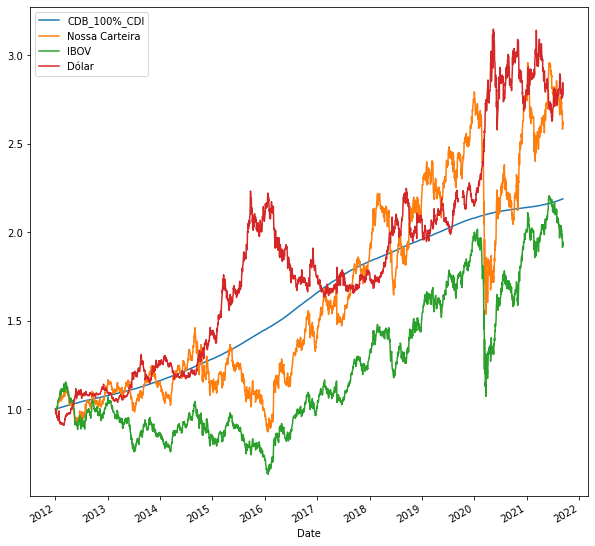

In [ ]:
PL_normalizado[['CDB_100%_CDI', 'Nossa Carteira', 'IBOV', 'Dólar']].plot(figsize = (10,10));

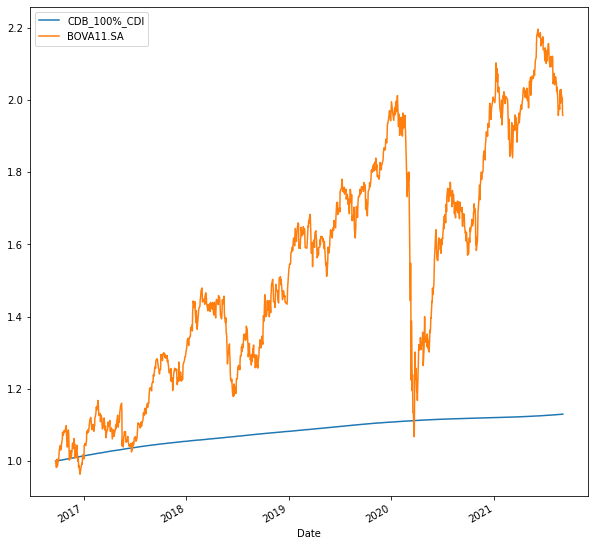

In [ ]:
PL_normalizado[['CDB_100%_CDI', 'BOVA11.SA']].plot(figsize = (10,10));

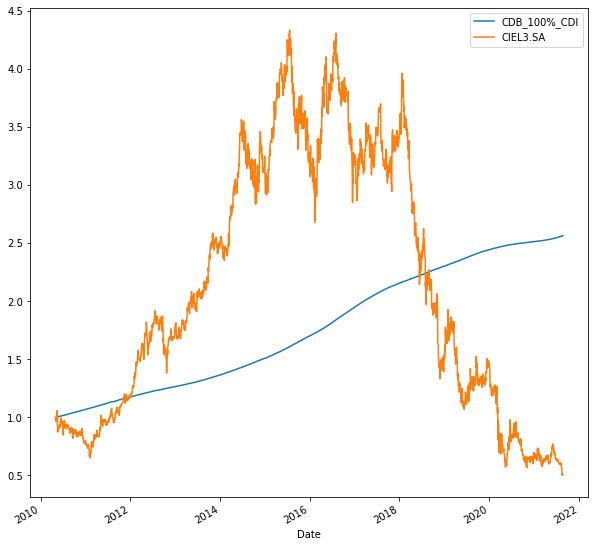

In [ ]:
PL_normalizado[['CDB_100%_CDI', 'CIEL3.SA']].plot(figsize = (10,10));

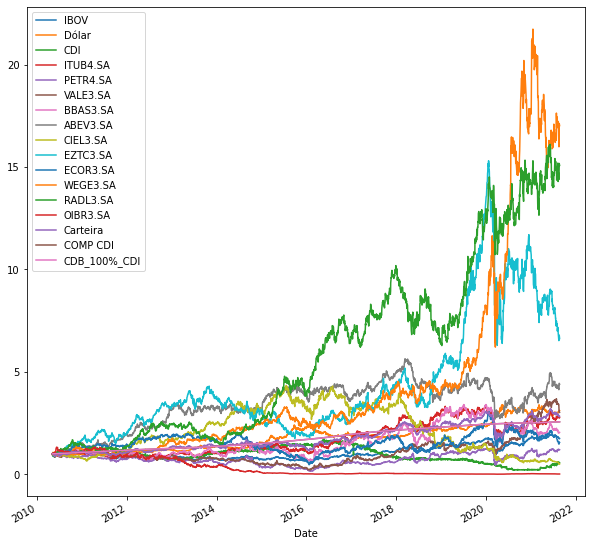

In [ ]:
PL_normalizado.plot(figsize = (10,10));